# Decision Tree Regression

Regression done using decision trees, which is a way to classify or infer data based on a set of 'decisions' or questions on individual features which describe the data. Decisions are made recursively until we reach what is called a 'leaf' node, or a decision which only involves the dependent or target variable. A good, visual explanation of this can be found in these videos:
1. Decision Tree Classifier - https://youtu.be/ZVR2Way4nwQ (start here for basics on decision trees)
2. Decision Tree Regression - https://youtu.be/UhY5vPfQIrA

### Import python libraries

In [7]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn libraries for decision tree regression
from sklearn.tree import DecisionTreeRegressor, plot_tree


## Salary Position Dataset

### Import the dataset

In [28]:
# import dataset
dataset = pd.read_csv('datasets/salary_position.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [29]:
# split dataset into independent and dependent variables
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# print X and y
print(f'Features: {X}')
print(f'Target: {y}')

Features: [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Target: [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Train decision tree model

In [30]:
# train decision tree regression model on the whole dataset
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X, y)

# predict for all levels
y_pred = dt_reg.predict(X)

# concatenate y and y_pred into y_out
y_out = np.concatenate((y.reshape(len(y), 1), y_pred.reshape(len(y_pred), 1)), 1)

# print y_out
print(f'Actual and predicted salaries: {y_out}')

Actual and predicted salaries: [[  45000.   45000.]
 [  50000.   50000.]
 [  60000.   60000.]
 [  80000.   80000.]
 [ 110000.  110000.]
 [ 150000.  150000.]
 [ 200000.  200000.]
 [ 300000.  300000.]
 [ 500000.  500000.]
 [1000000. 1000000.]]


In [31]:
# predict a new result
y_pred_new = dt_reg.predict([[6.5]])

# print y_pred_new
print(f'Predicted salary for level 6.5: {y_pred_new}')


Predicted salary for level 6.5: [150000.]


### Visualize the decision tree model results

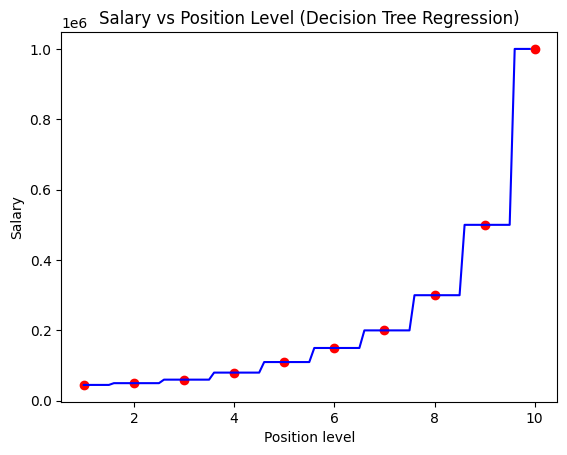

In [38]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, dt_reg.predict(X_grid), color='blue')
plt.title('Salary vs Position Level (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Visualize the decision tree using plot_tree

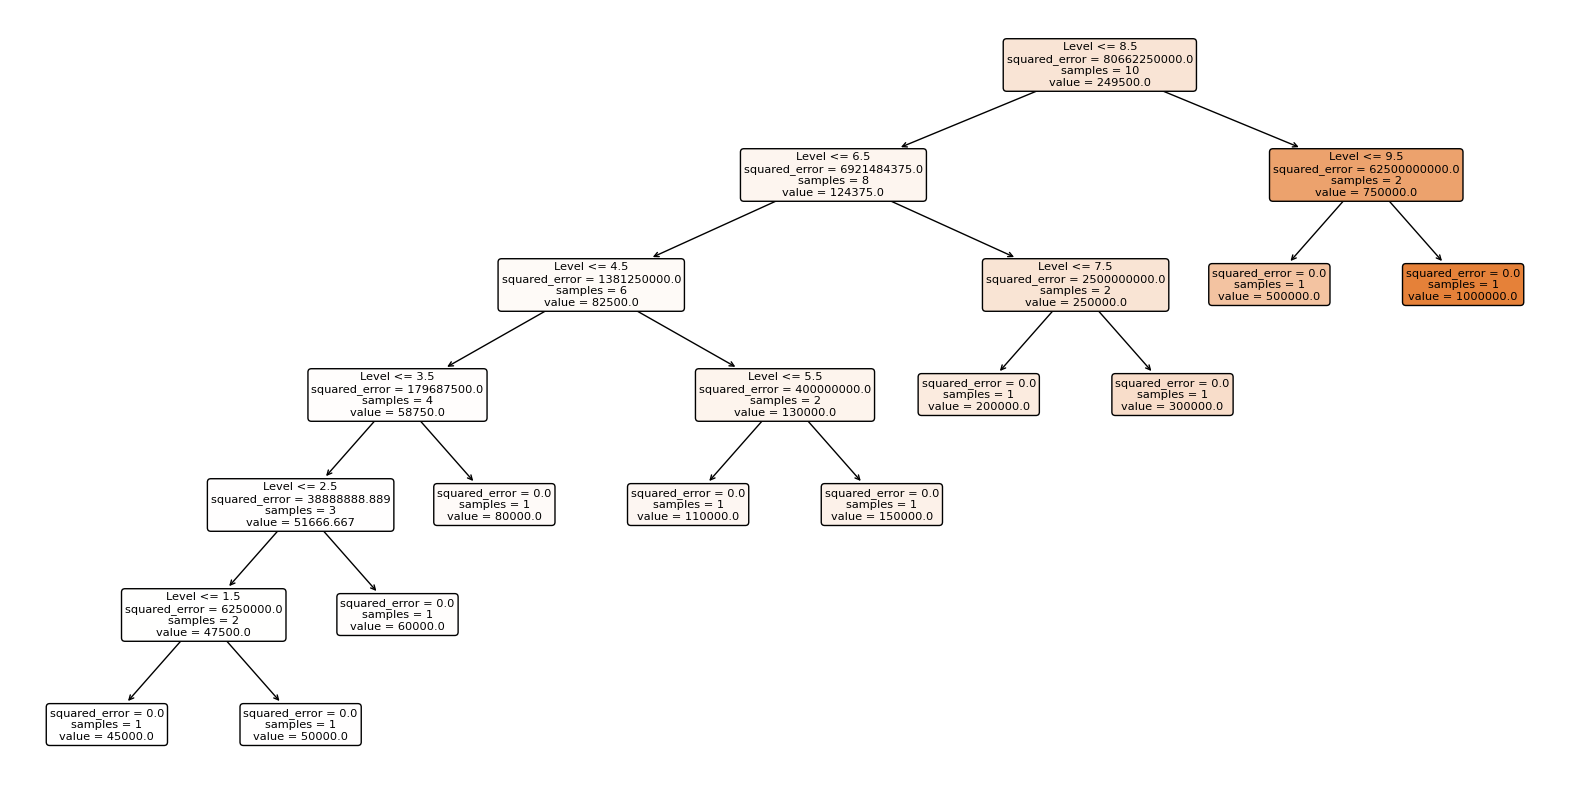

In [33]:
# visulize decision tree regression results using plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, filled=True, rounded=True, feature_names=['Level'], class_names=['Salary'])
plt.show()

## California Housing dataset from sklearn

### Import dataset

In [12]:
# import boston housing dataset
from sklearn.datasets import fetch_california_housing

# load boston housing dataset
cal_data = fetch_california_housing()

# print cal_data features and target
print(f'Features: {cal_data.feature_names}')
print(f'Target: {cal_data.target_names}')

# print cal_data description
print(cal_data.DESCR)


Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is

In [15]:
# split cal data into independent and dependent variables
X_cal = cal_data.data
y_cal = cal_data.target

# print first 5 rows of X and y
print(f'Sample Features: {X_cal[:5]}')
print(f'Sample Target: {y_cal[:5]}')

Sample Features: [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
Sample Target: [4.526 3.585 3.521 3.413 3.422]


### Create training and test sets

In [16]:
# split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(X_cal, y_cal, test_size=0.2, random_state=42)

# print number of data points of training and test sets
print(f'Number of training data points: {len(X_cal_train)}')
print(f'Number of test data points: {len(X_cal_test)}')

Number of training data points: 16512
Number of test data points: 4128


### Train Decision Tree Regressor with training data

In [20]:
# train decision tree regression model on the training set
dt_reg_cal = DecisionTreeRegressor(random_state=42)
dt_reg_cal.fit(X_cal_train, y_cal_train)

# predict the test set results
y_cal_pred = dt_reg_cal.predict(X_cal_test)

#create output array by concatenating y_cal_test and y_cal_pred
y_cal_out = np.concatenate((y_cal_test.reshape(len(y_cal_test), 1), y_cal_pred.reshape(len(y_cal_pred), 1)), 1)

# print first 5 rows of y_cal_out
print(f'Actual and predicted values: {y_cal_out[:5]}')

Actual and predicted values: [[0.477   0.414  ]
 [0.458   1.203  ]
 [5.00001 5.00001]
 [2.186   2.17   ]
 [2.78    2.257  ]]


### Evaluate model performance

In [22]:
# evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

# calculate mean squared error for training & test sets
mse_train = mean_squared_error(y_cal_train, dt_reg_cal.predict(X_cal_train))
mse_test = mean_squared_error(y_cal_test, y_cal_pred)

# calculate r2 score for training & test sets
r2_train = r2_score(y_cal_train, dt_reg_cal.predict(X_cal_train))
r2_test = r2_score(y_cal_test, y_cal_pred)

# print mse and r2 scores
print(f'Mean Squared Error for training set: {mse_train}')
print(f'Mean Squared Error for test set: {mse_test}')
print(' ')
print(f'R2 Score for training set: {r2_train}')
print(f'R2 Score for test set: {r2_test}')

Mean Squared Error for training set: 1.0357621381535573e-31
Mean Squared Error for test set: 0.495235205629094
 
R2 Score for training set: 1.0
R2 Score for test set: 0.622075845135081


### Visualize the tree

For this dataset, the entire tree will be too large to visualize like in the previous dataset. We can get an overall picture of the tree complexity by looking at how many nodes were built by the algorithm.

In [24]:
# count number of nodes in the decision tree
print(f'Number of nodes in the decision tree: {dt_reg_cal.tree_.node_count}')

Number of nodes in the decision tree: 31707


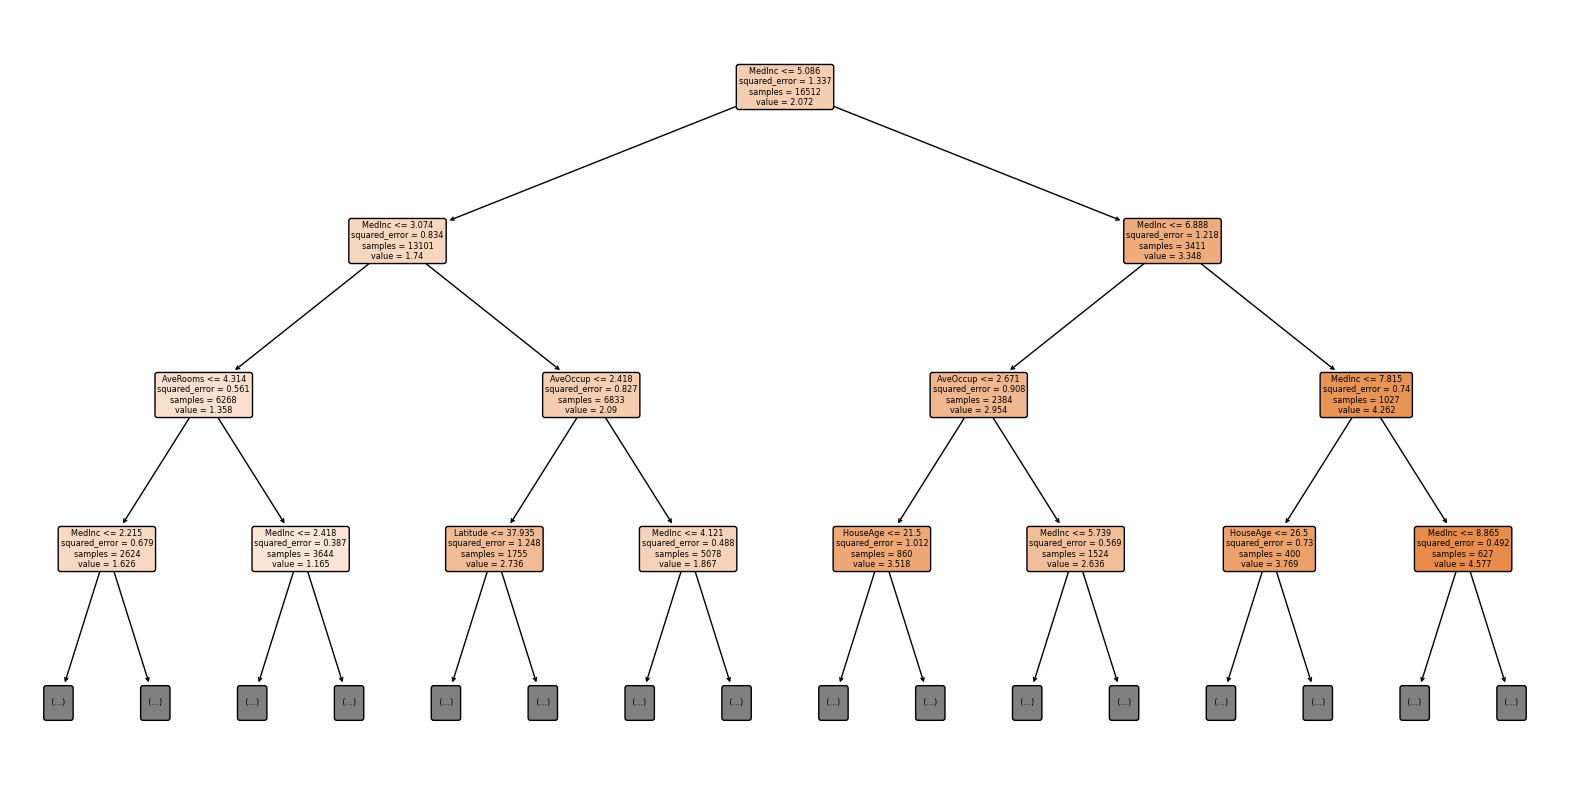

In [26]:
# visualize decision tree regression results using plot_tree up to 3 levels
plt.figure(figsize=(20, 10))
plot_tree(dt_reg_cal, filled=True, rounded=True, feature_names=cal_data.feature_names, class_names=cal_data.target_names, max_depth=3)
plt.show()